# TextMining
  https://www.lucypark.kr/courses/2015-ba/text-mining.html  참고 

## Before install konlpy 
 - http://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype 
 - download jpype matching python version 
 - install jpype.whl file 
 - pip install .whl file

## Terminologies

<p><table class="table"><tr><th>English</th><th>한국어</th><th>Description</th></tr><tr><td>Document</td><td>문서</td><td>-</td></tr><tr><td>Corpus</td><td>말뭉치</td><td>A set of documents</td></tr><tr><td>Token</td><td>토큰</td><td>Meaningful elements in a text such as words or phrases or symbols</td></tr><tr><td>Morphemes</td><td>형태소</td><td>Smallest meaningful unit in a language</td></tr><tr><td>POS</td><td>품사</td><td>Part-of-speech (ex: Nouns)</td></tr><tr><td>Classification</td><td>분류</td><td>A supervised learning task where $X$ and $y$ are given and $y$ is a set of discrete classes</td></tr><tr><td>Clustering</td><td>군집화</td><td>An unsupervised learning task where $X$ is given</td></tr></table></p>

## Text analysis process
 1. Load text
 2. Tokenize text (ex: stemming, morph analyzing)
 3. Tag tokens (ex: POS, NER)
 4. Token(Feature) selection and/or filter/rank tokens (ex: stopword removal, TF-IDF)
 5. ...and so on (ex: calculate word/document similarities, cluster documents)

In [22]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='HYsanB')  # 한글 폰트 설정

## Python Packages for Text Mining and NLP

In [9]:
import nltk

In [10]:
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\byung\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\byung\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

## Text exploration

## 1. Read document
### English

In [33]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

### Korean

In [12]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

## 2. Tokenize
 - There are numerous ways to tokenize a document.
 - Here, we use nltk.regexp_tokenize for English, konlpy.tag.Twitter.morph for Korean text.

### english

In [34]:
from nltk import regexp_tokenize
pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
tokens_en = regexp_tokenize(doc_en, pattern)

### Korean

In [14]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

## 3. Load tokens with nltk.Text()

## english

In [35]:
import nltk
en = nltk.Text(tokens_en)

## korean

In [17]:
import nltk
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')   # For Python 2, input `name` as u'유니코드'

### 3-1 Tokens

In [36]:
print(len(en.tokens))       # returns number of tokens (document length)
print(len(set(en.tokens)))  # returns number of unique tokens
en.vocab()                  # returns frequency distribution

191061
232


FreqDist({('', '', ''): 190496,
          ('', '-Churchill', ''): 1,
          ('', '-Hart_', ''): 1,
          ('', '-JULY', ''): 1,
          ('', '-Mill', ''): 7,
          ('', '-Weston', ''): 1,
          ('', '-able', ''): 1,
          ('', '-aches', ''): 1,
          ('', '-all', ''): 1,
          ('', '-approbation', ''): 2,
          ('', '-arm', ''): 1,
          ('', '-arrangement', ''): 1,
          ('', '-ashamed', ''): 1,
          ('', '-assorted', ''): 1,
          ('', '-back', ''): 1,
          ('', '-baits', ''): 1,
          ('', '-baked', ''): 1,
          ('', '-bathing', ''): 2,
          ('', '-be', ''): 1,
          ('', '-beds', ''): 3,
          ('', '-beer', ''): 4,
          ('', '-behaved', ''): 2,
          ('', '-bestowed', ''): 1,
          ('', '-betweens', ''): 1,
          ('', '-blanche', ''): 1,
          ('', '-boarder', ''): 3,
          ('', '-book', ''): 2,
          ('', '-boot', ''): 1,
          ('', '-boy', ''): 1,
          ('', '-bred', '

In [19]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

1707
476


FreqDist({'%': 10,
          '(': 27,
          ')': 26,
          ').': 1,
          '+': 3,
          ',': 26,
          '-': 21,
          '--------': 1,
          '----------': 1,
          '-------------------------': 1,
          '---------------------------': 2,
          '----------------------------': 4,
          '--------------.': 1,
          '-------------.---------------': 1,
          '.': 61,
          '/': 1,
          '0': 5,
          '02': 1,
          '056': 1,
          '1': 13,
          '10': 6,
          '11': 2,
          '12': 1,
          '145': 1,
          '184': 1,
          '185': 1,
          '19': 1,
          '2': 11,
          '20': 1,
          '200': 2,
          '2007': 3,
          '2008': 1,
          '2009': 1,
          '2010': 3,
          '2011': 6,
          '21': 2,
          '29': 1,
          '291': 1,
          '3': 8,
          '30': 1,
          '34': 1,
          '35': 1,
          '396': 1,
          '4': 8,
          '40': 7,
     

### 3-2 Plot frequency distributions
 - english

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

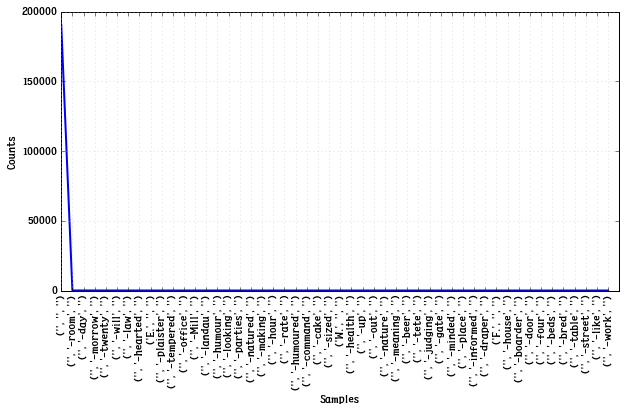

In [29]:
en.plot(50)     # Plot sorted frequency of top 50 tokens

 - korean

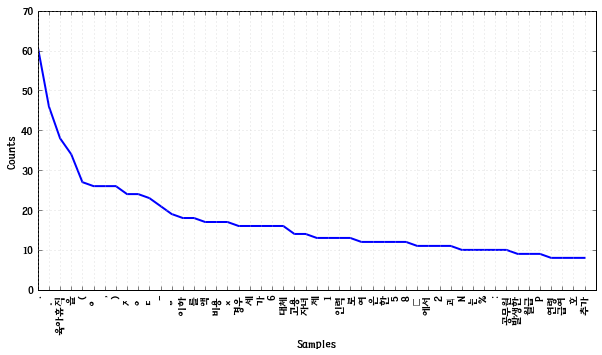

In [30]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

### 3-3 count
 - english

In [41]:
en.count('Jane')        # Counts occurrences

0

 - korean

In [40]:
ko.count('초등학교')   # Counts occurrences

6

### 3-4 Dispersion plot

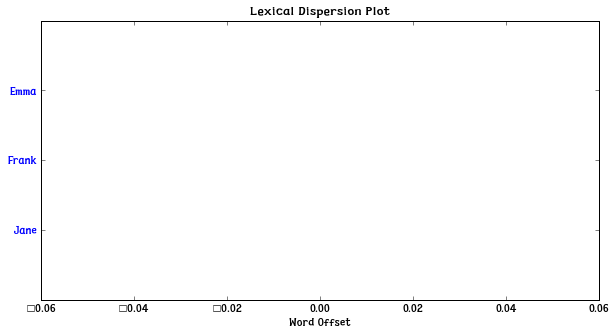

In [42]:
en.dispersion_plot(['Emma', 'Frank', 'Jane'])